In [8]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Polygon

folder = 'data'

def map_trajectory_fid_to_osmid_and_get_count(results, edges):
    """Function to map fid to osmid and get count of each osmid in all trajectories."""
    road_segment_counts = {}
    for idx in results['Index'].values:
        traject_path = results.loc[results['Index'] == idx, 'cpath'].values[0]
        traject_path = json.loads(traject_path.replace("'", '"'))  # Convert string list to JSON
        for fid in traject_path:
            edges_info = edges[edges['fid'] == fid].to_dict(orient='records')[0]
            osmid = edges_info['osmid']
            if osmid not in road_segment_counts:
                road_segment_counts[osmid] = 1
            else:
                road_segment_counts[osmid] += 1
    return road_segment_counts

if __name__ == "__main__":

    # Define Porto bounding box and create the street network
    bounds = (-8.70, -8.57, 41.19, 41.13)
    x1, x2, y1, y2 = bounds
    boundary_polygon = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
    G = ox.graph_from_polygon(boundary_polygon, network_type='drive')

    # Read the CSV file you uploaded
    results_fmm_df = pd.read_csv(os.path.join(folder, 'map_matching.csv'))

    # Load the network edges shapefile
    edges_shapefile = gpd.read_file(os.path.join(folder, "porto\edges.shp"))
    edges_shapefile = edges_shapefile[['name', 'u', 'v', 'length', 'osmid', 'fid', 'geometry']]

    # Map trajectory FIDs from the CSV to OSMIDs in the edges file
    road_segment_counts = map_trajectory_fid_to_osmid_and_get_count(
        results_fmm_df, edges_shapefile)

    # Get the top 10 most traversed road segments
    top_10_segments = sorted(road_segment_counts, key=road_segment_counts.get, reverse=True)[:10]
    top_10_segments_df = pd.DataFrame(data={
        'osmid': top_10_segments
    })

    # Get route information for the top 10 segments
    top_10_geoms_df = top_10_segments_df.merge(edges_shapefile, on=['osmid'], how='left')

    # Plot the trajectories
    fig, ax = ox.plot_graph(G, figsize=(30, 20),
                            show=False, node_size=0, bgcolor='w', edge_color="k", edge_linewidth=0.5)
    for osmid in top_10_geoms_df['osmid'].unique():
        name = top_10_geoms_df.loc[top_10_geoms_df['osmid'] == osmid, 'name'].unique()[0]
        count = road_segment_counts[osmid]

        geom_lon_lat = []
        for edge in top_10_geoms_df[top_10_geoms_df['osmid'] == osmid].itertuples():
            geom = str(edge.geometry)
            geom = geom.lstrip('LINESTRING (').rstrip(')')
            geom = geom.split(', ')
            geom_lon_lat += [m.split(' ') for m in geom]
        geom_lon_lat = sorted(geom_lon_lat)

        lon = [float(l) for l in np.array(geom_lon_lat)[:, 0]]
        lat = [float(l) for l in np.array(geom_lon_lat)[:, 1]]
        plt.plot(lon, lat, linestyle='-', label=f'{name} (Trip Counts: {count})', linewidth=3)

    plt.legend(fontsize=25)
    plt.savefig(os.path.join(folder, 'Top_10_Most_Traversed_Road_Segments.png'))
    plt.show()


C:\Users\perry\AppData\Local\Temp\ipykernel_24868\1252159541.py:36: DtypeWarning: Columns (699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,9

JSONDecodeError: Extra data: line 1 column 10 (char 9)

Skipping invalid JSON in cpath:  'spdist': 0.0022882821117648413
Skipping invalid JSON in cpath:  41.084153]
Skipping invalid JSON in cpath:  41.143125]
Skipping invalid JSON in cpath:  41.238807]
Skipping invalid JSON in cpath:  41.211666]
Skipping invalid JSON in cpath:  'offset': 0.0
No cpath found for t_number nan. Skipping.
Skipping invalid JSON in cpath:  'length': 0.0021078731500778665
No cpath found for t_number nan. Skipping.
Skipping invalid JSON in cpath:  41.171779]
Skipping invalid JSON in cpath:  {'eid': 132212
Skipping invalid JSON in cpath:  'tp': 1.0}
Skipping invalid JSON in cpath:  {'eid': 184511
Skipping invalid JSON in cpath:  [-8.5778065
Skipping invalid JSON in cpath:  [-8.6274071
Skipping invalid JSON in cpath:  'target': 1235787118
Skipping invalid JSON in cpath:  'source': 138231423
Skipping invalid JSON in cpath:  'target': 1166036861
Skipping invalid JSON in cpath:  41.148983]
Skipping invalid JSON in cpath:  'offset': 4.5306693231123245e-05
Skipping invalid

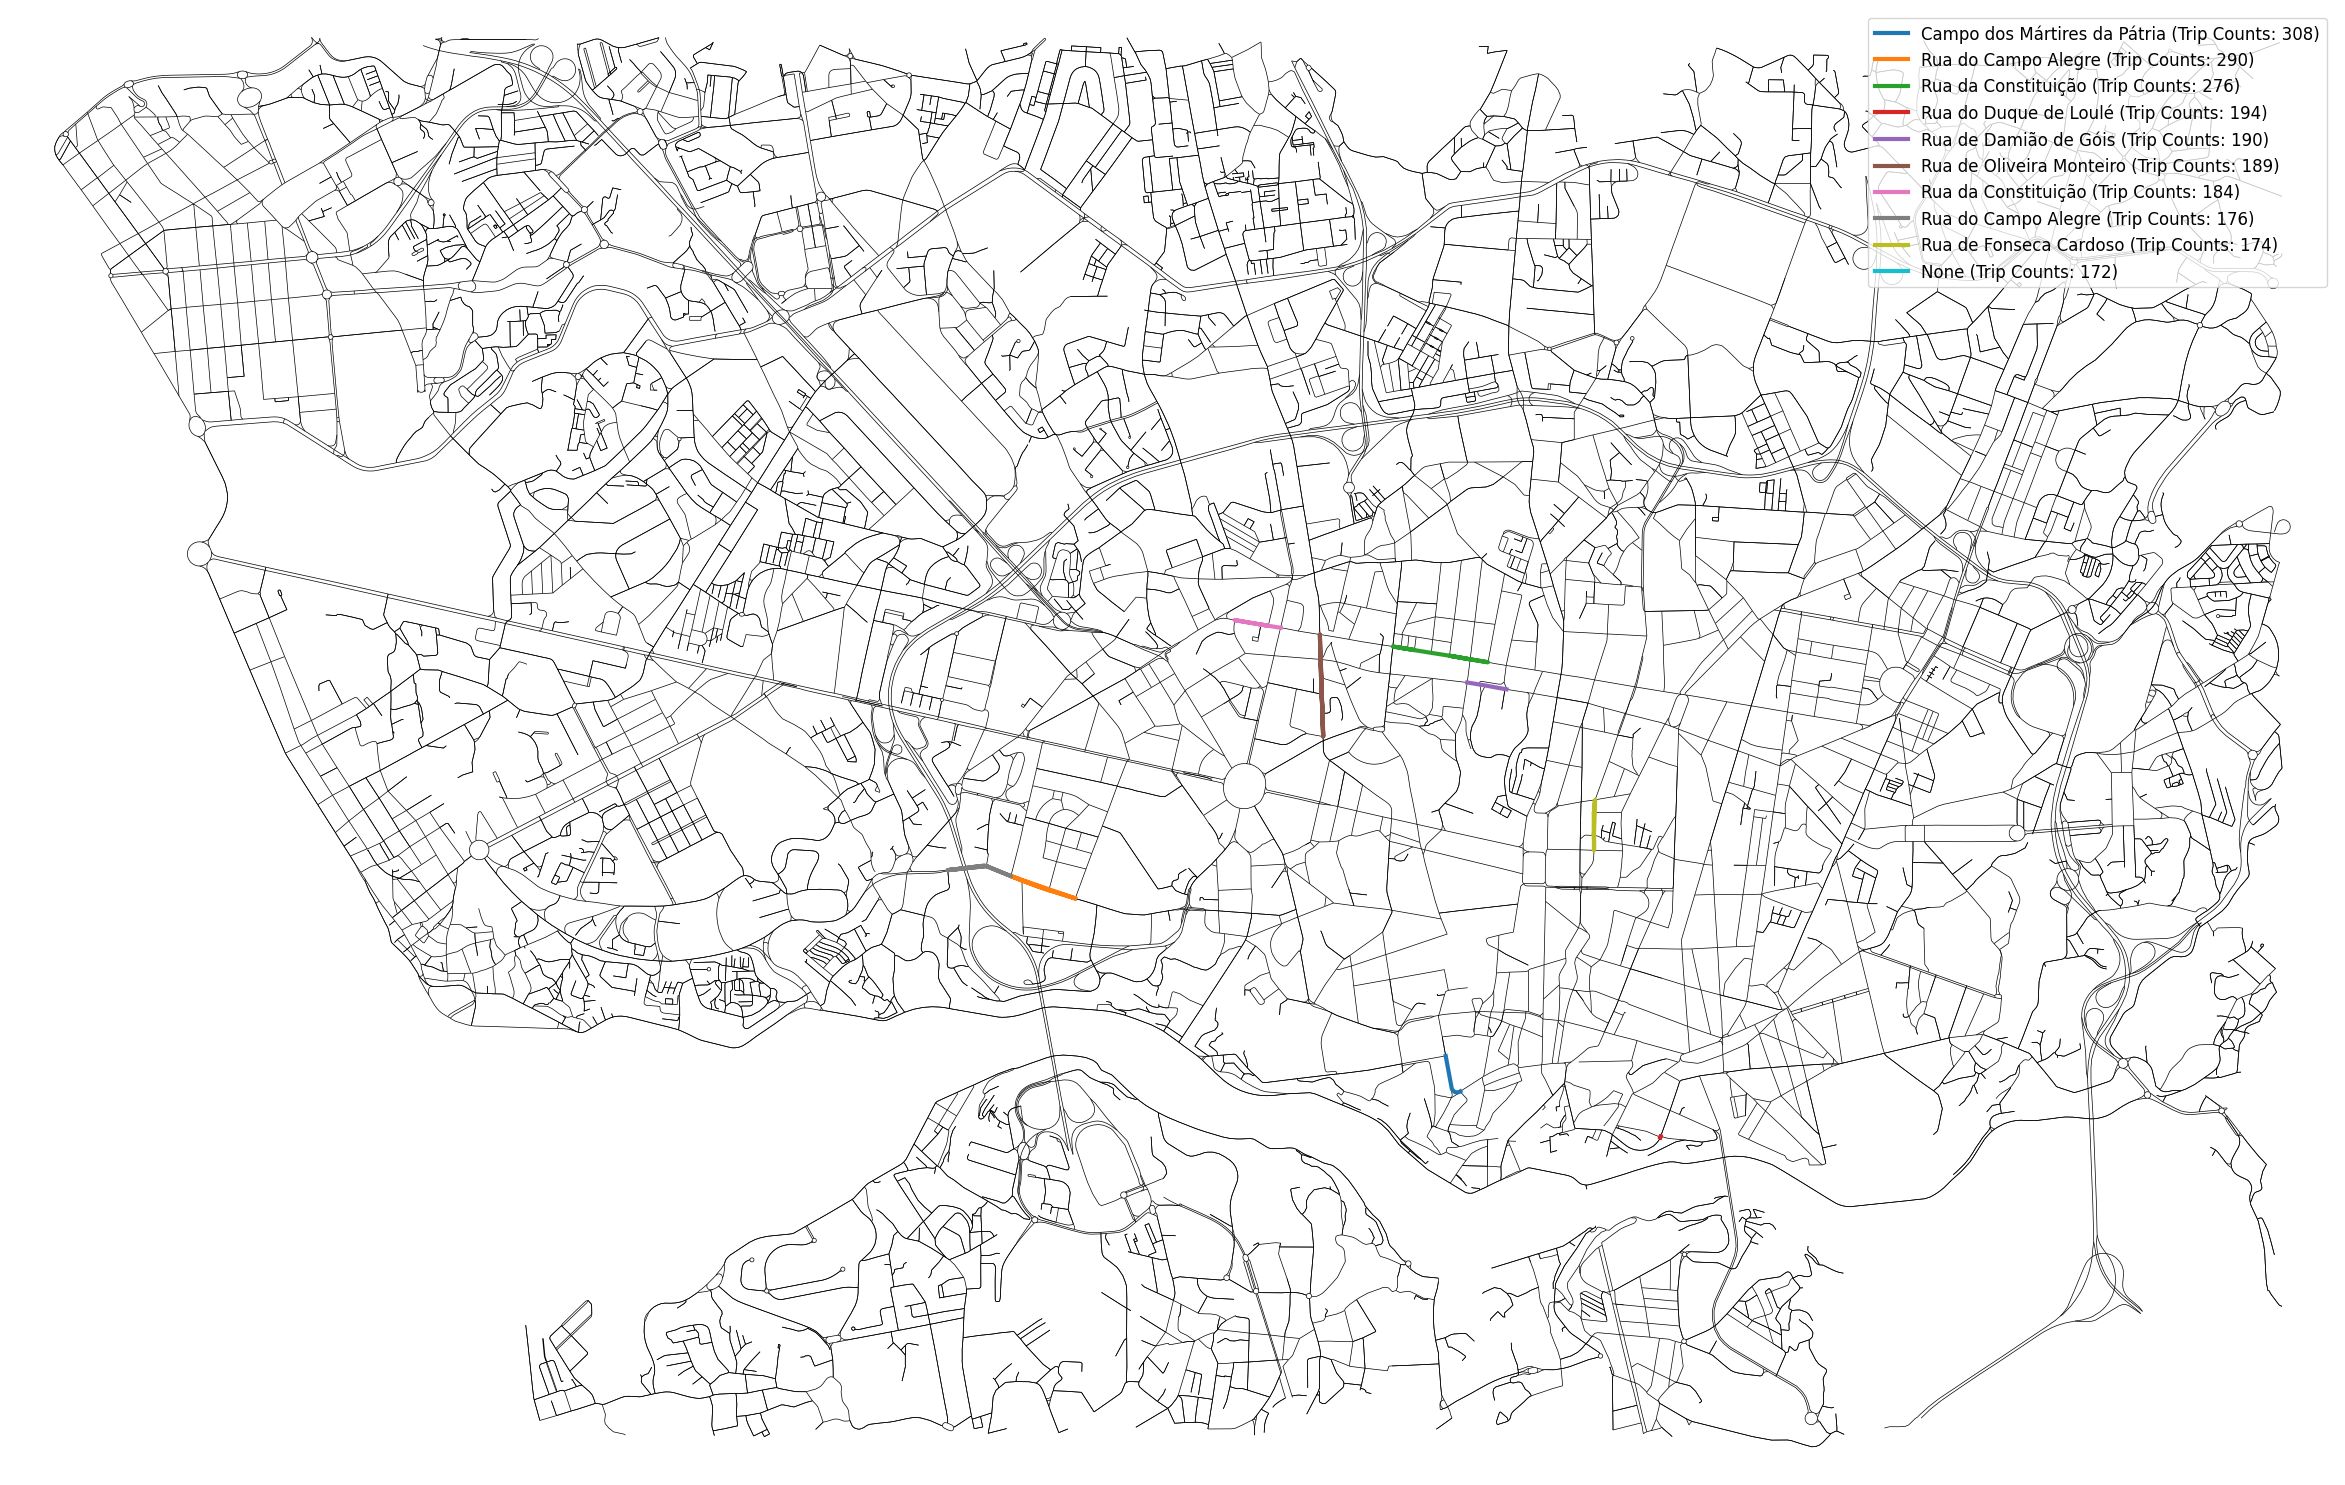

In [6]:
import os
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

# Directory containing data files
folder = 'data'  # Update with actual path if needed

# Load the map-matching results CSV file, selecting only necessary columns
results_fmm_df = pd.read_csv(os.path.join(folder, 'map_matching.csv'), usecols=['t_number', 'cpath'])

# Load the edges shapefile, filtering relevant columns
edges_shapefile_path = os.path.join(folder, "porto/edges.shp")
edges_shapefile = gpd.read_file(edges_shapefile_path)
edges_shapefile = edges_shapefile[['name', 'u', 'v', 'length', 'osmid', 'fid', 'geometry']]

def map_trajectory_fid_to_osmid_and_get_count(results, edges):
    """Map fid to osmid and get count of each osmid in all trajectories."""
    road_segment_counts = {}
    for idx in results['t_number'].values:
        # Check if there is a valid 'cpath' entry for the current 't_number'
        cpath_row = results.loc[results['t_number'] == idx, 'cpath']
        if cpath_row.empty:
            print(f"No cpath found for t_number {idx}. Skipping.")
            continue

        # Extract 'cpath' field and attempt JSON conversion
        cpath_str = cpath_row.values[0]
        try:
            traject_path = json.loads(cpath_str)
            if not isinstance(traject_path, list):
                print(f"Skipping invalid cpath (not a list): {cpath_str}")
                continue
        except json.JSONDecodeError:
            print(f"Skipping invalid JSON in cpath: {cpath_str}")
            continue
        
        for fid in traject_path:
            # Map fid to osmid
            matching_edges = edges[edges['fid'] == fid]
            if not matching_edges.empty:
                osmid = matching_edges['osmid'].values[0]
                road_segment_counts[osmid] = road_segment_counts.get(osmid, 0) + 1
    return road_segment_counts

# Calculate road segment traversal counts
road_segment_counts = map_trajectory_fid_to_osmid_and_get_count(results_fmm_df, edges_shapefile)

# Define Porto bounding box and create the street network graph for visualization
bounds = (-8.70, -8.57, 41.19, 41.13)
x1, x2, y1, y2 = bounds
boundary_polygon = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')

# Get the top 10 most traversed road segments
top_10_segments = sorted(road_segment_counts, key=road_segment_counts.get, reverse=True)[:10]
top_10_segments_df = pd.DataFrame(data={'osmid': top_10_segments})

# Merge top segments with edges to get geometry and other info
top_10_geoms_df = top_10_segments_df.merge(edges_shapefile, on='osmid', how='left')

# Plot the street network and top traversed segments
fig, ax = ox.plot_graph(G, figsize=(30, 20), show=False, node_size=0, bgcolor='w', edge_color="k", edge_linewidth=0.5)
for osmid in top_10_geoms_df['osmid'].unique():
    name = top_10_geoms_df.loc[top_10_geoms_df['osmid'] == osmid, 'name'].unique()[0]
    count = road_segment_counts[osmid]

    # Extract lon-lat pairs from segment geometries
    geom_lon_lat = []
    for edge in top_10_geoms_df[top_10_geoms_df['osmid'] == osmid].itertuples():
        geom = edge.geometry
        if geom is not None:
            coords = list(geom.coords)
            geom_lon_lat.extend(coords)

    # Convert to lon and lat lists
    lon, lat = zip(*geom_lon_lat)
    plt.plot(lon, lat, linestyle='-', label=f'{name} (Trip Counts: {count})', linewidth=3)

# Add legend and save the figure
plt.legend(fontsize=12)
plt.savefig(os.path.join(folder, 'Top_10_Most_Traversed_Road_Segments.png'))
plt.show()


In [11]:
import os
import json
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Polygon

folder = 'data'

def clean_and_parse_cpath(cpath):
    """Attempts to clean and parse the 'cpath' column entry as JSON."""
    cpath = re.sub(r"[']", '"', str(cpath))  # Replace single quotes with double quotes
    cpath = re.sub(r'\s+', '', cpath)        # Remove any excess whitespace
    try:
        return json.loads(cpath)
    except json.JSONDecodeError:
        print(f"Error parsing JSON for cpath: {cpath}")
        return []  # Return an empty list if parsing fails

def map_trajectory_fid_to_osmid_and_get_count_and_times(results, edges):
    """Map FIDs to OSMIDs, count traversals, and calculate average travel times."""
    road_segment_counts = {}
    road_segment_times = {}

    for idx, row in results.iterrows():
        traject_path = clean_and_parse_cpath(row['cpath'])
        matched_indices = clean_and_parse_cpath(row['Matched_edge_index'])
        
        for i, fid in enumerate(traject_path):
            matching_edges = edges[edges['fid'] == fid]
            if not matching_edges.empty:
                osmid = matching_edges.iloc[0]['osmid']
                
                # Update counts
                road_segment_counts[osmid] = road_segment_counts.get(osmid, 0) + 1
                
                # Estimate time per segment and update travel times
                time_for_segment = matched_indices[i] if i < len(matched_indices) else 0
                if osmid not in road_segment_times:
                    road_segment_times[osmid] = []
                road_segment_times[osmid].append(time_for_segment)

    # Calculate average travel times
    avg_travel_times = {osmid: np.mean(times) for osmid, times in road_segment_times.items()}
    return road_segment_counts, avg_travel_times

def plot_top_segments(G, edges_df, top_segments, title, filename):
    """Plots the top segments on the given street network graph."""
    fig, ax = ox.plot_graph(G, figsize=(15, 10), show=False, node_size=0, bgcolor='w', edge_color="k", edge_linewidth=0.5)
    
    for osmid in top_segments['osmid'].unique():
        segment = edges_df[edges_df['osmid'] == osmid]
        if not segment.empty:
            geom = segment.iloc[0].geometry
            if geom is not None:
                lon, lat = geom.xy
                plt.plot(lon, lat, linestyle='-', label=f'OSMID: {osmid}', linewidth=3)

    plt.title(title, fontsize=15)
    plt.legend(fontsize=10)
    plt.savefig(filename)
    plt.show()

if __name__ == "__main__":

    # Define Porto bounding box and create the street network
    bounds = (-8.70, -8.57, 41.19, 41.13)
    x1, x2, y1, y2 = bounds
    boundary_polygon = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
    G = ox.graph_from_polygon(boundary_polygon, network_type='drive')

    # Read the CSV file containing map-matching results
    results_fmm_df = pd.read_csv(os.path.join(folder, 'map_matching.csv'))

    # Load the network edges shapefile
    edges_shapefile = gpd.read_file(os.path.join(folder, "porto/edges.shp"))
    edges_shapefile = edges_shapefile[['name', 'u', 'v', 'length', 'osmid', 'fid', 'geometry']]

    # Map trajectory FIDs to OSMIDs, count traversals, and compute travel times
    road_segment_counts, avg_travel_times = map_trajectory_fid_to_osmid_and_get_count_and_times(
        results_fmm_df, edges_shapefile)

    # Get the top 10 most traversed road segments
    top_10_traversed_segments = sorted(road_segment_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    top_10_traversed_df = pd.DataFrame(data={
        'osmid': [seg[0] for seg in top_10_traversed_segments],
        'count': [seg[1] for seg in top_10_traversed_segments]
    })

    # Get the top 10 road segments by highest average travel time
    top_10_slowest_segments = sorted(avg_travel_times.items(), key=lambda x: x[1], reverse=True)[:10]
    top_10_slowest_df = pd.DataFrame(data={
        'osmid': [seg[0] for seg in top_10_slowest_segments],
        'avg_travel_time': [seg[1] for seg in top_10_slowest_segments]
    })

    # Plot the two maps separately
    plot_top_segments(G, edges_shapefile, top_10_traversed_df, 
                      "Top 10 Most Traversed Road Segments", 
                      os.path.join(folder, 'Top_10_Most_Traversed_Road_Segments.png'))
    
    plot_top_segments(G, edges_shapefile, top_10_slowest_df, 
                      "Top 10 Road Segments by Longest Average Travel Time", 
                      os.path.join(folder, 'Top_10_Longest_Average_Travel_Time_Segments.png'))


C:\Users\perry\AppData\Local\Temp\ipykernel_24868\2698076575.py:60: DtypeWarning: Columns (699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,9

Error parsing JSON for cpath: "spdist":0.0022882821117648413
Error parsing JSON for cpath: "tp":1.0}
Error parsing JSON for cpath: 41.084153]
Error parsing JSON for cpath: 41.08435]
Error parsing JSON for cpath: [-8.6144898
Error parsing JSON for cpath: [-8.6143732
Error parsing JSON for cpath: 41.143125]
Error parsing JSON for cpath: 41.143105]
Error parsing JSON for cpath: 41.238807]
Error parsing JSON for cpath: 41.238729]
Error parsing JSON for cpath: 41.211666]
Error parsing JSON for cpath: 41.211753]
Error parsing JSON for cpath: "offset":0.0
Error parsing JSON for cpath: "ep":0.5322619412741001
Error parsing JSON for cpath: "tp":0.9999995228987082}
Error parsing JSON for cpath: "source":513920996
Error parsing JSON for cpath: "length":0.0021078731500778665
Error parsing JSON for cpath: "spdist":7.746050091911511e-05
Error parsing JSON for cpath: [-8.5472351
Error parsing JSON for cpath: [-8.5472872
Error parsing JSON for cpath: {"eid":4091
Error parsing JSON for cpath: "target":